In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
from pathlib import Path
from keras.preprocessing import image
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
# from google.colab import files
# files.upload()


In [5]:
# ! mkdir ~/.kaggle

In [6]:
# ! cp kaggle.json ~/.kaggle/

In [7]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# ! kaggle datasets list

In [9]:
# !kaggle datasets download -d grassknoted/asl-alphabet

In [10]:
# !dir

In [11]:
#  !mkdir dataset

In [12]:
# ! unzip asl-alphabet.zip -d dataset/

## Exploring Dataset

In [13]:
train_dir = 'dataset/asl_alphabet_train/asl_alphabet_train/'
test_dir = 'dataset/asl_alphabet_test/asl_alphabet_test/'

classes = []
for folder in os.listdir(train_dir):
  if not folder.startswith('.'):
    folder = str(folder)
    classes.append(folder.split('/')[-1])

In [14]:
classes = sorted(classes)
print(classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [15]:

target_size = 64

gesture_to_label = {}
i = 0
for gesture in classes:
  gesture_to_label[gesture] = i
  i+=1
print(gesture_to_label)


label_to_gesture = {}
i = 0
for gesture in classes:
  label_to_gesture[i] = gesture
  i+=1
print(label_to_gesture)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


In [16]:
def getData():
  X_train = []
  Y_train = []

  for sign in classes:
    folder_path = Path(train_dir + sign + '/')
    for img_path in folder_path.glob('*.jpg'):
      img = image.load_img(img_path, target_size=(64,64))
      img_array = image.img_to_array(img)
      X_train.append(img_array)
      Y_train.append(gesture_to_label[sign])
    print("Loaded " + sign)
  return X_train, Y_train
X_train, Y_train = getData()
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape, Y_train.shape)

Loaded A
Loaded B
Loaded C
Loaded D
Loaded E
Loaded F
Loaded G
Loaded H
Loaded I
Loaded J
Loaded K
Loaded L
Loaded M
Loaded N
Loaded O
Loaded P
Loaded Q
Loaded R
Loaded S
Loaded T
Loaded U
Loaded V
Loaded W
Loaded X
Loaded Y
Loaded Z
Loaded del
Loaded nothing
Loaded space
(87000, 64, 64, 3) (87000,)


In [17]:
X_train = X_train/255.0
X_train.shape, Y_train.shape

((87000, 64, 64, 3), (87000,))

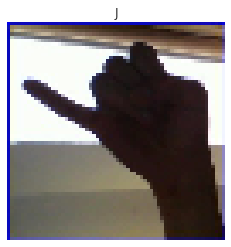

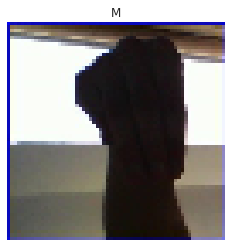

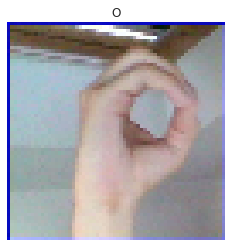

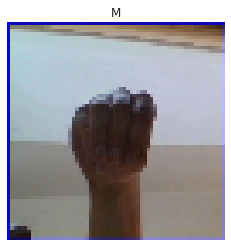

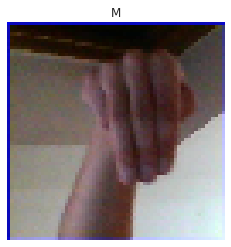

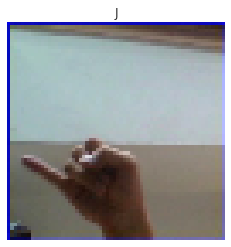

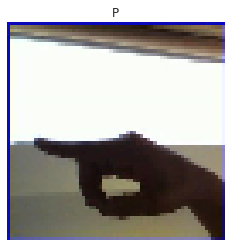

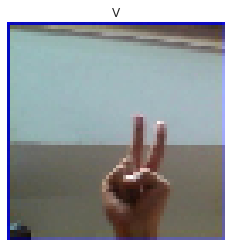

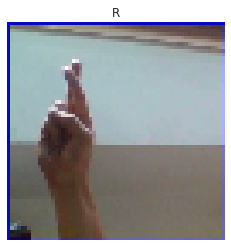

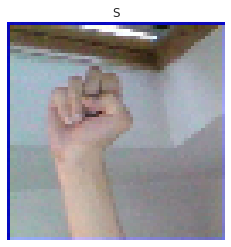

In [18]:
def printData(k=10):
  for _ in range(k):
    idx = random.randint(0, X_train.shape[0])
    plt.imshow(X_train[idx])
    plt.title(label_to_gesture[Y_train[idx]])
    plt.axis('off')
    plt.show()
printData()

In [19]:
from keras.utils import to_categorical
from sklearn.utils import shuffle
# to_categorical?

In [20]:
ytrain = to_categorical(Y_train)
print(ytrain.shape, ytrain[0])

(87000, 29) [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [21]:
# Shuffle Dataset
X,Y = shuffle(X_train, ytrain, random_state=2)

In [22]:
from sklearn.model_selection import train_test_split

xtrain = X[0:69600]
ytrain = Y[0:69600]

xtest = X[69600: ]
ytest = Y[69600:]

# xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape) 

(69600, 64, 64, 3) (69600, 29)
(17400, 64, 64, 3) (17400, 29)


In [23]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow

In [33]:
modelcheckpoint = ModelCheckpoint('mymodel.h5', save_best_only=True)
earlystopping = EarlyStopping(patience=2, restore_best_weights=True)

In [25]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model

from matplotlib import pyplot as plt

In [37]:
base_model = VGG16(weights = 'imagenet', include_top=False, input_shape=(target_size, target_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
# first: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [40]:
hist = model.fit(xtrain,ytrain,epochs=10,batch_size=64,shuffle=True,validation_data=[xtest,ytest], callbacks=[modelcheckpoint, earlystopping])

Train on 69600 samples, validate on 17400 samples
Epoch 1/10
69600/69600 [==============================] - 3253s 47ms/step - loss: 0.7610 - accuracy: 0.7858 - val_loss: 0.2909 - val_accuracy: 0.9156
Epoch 2/10
69600/69600 [==============================] - 3264s 47ms/step - loss: 0.1960 - accuracy: 0.9394 - val_loss: 0.1691 - val_accuracy: 0.9426
Epoch 3/10
69600/69600 [==============================] - 3257s 47ms/step - loss: 0.1089 - accuracy: 0.9659 - val_loss: 0.1942 - val_accuracy: 0.9326
Epoch 4/10
69600/69600 [==============================] - 3276s 47ms/step - loss: 0.0722 - accuracy: 0.9765 - val_loss: 0.0911 - val_accuracy: 0.9669
Epoch 5/10
69600/69600 [==============================] - 3267s 47ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0857 - val_accuracy: 0.9698
Epoch 6/10
  256/69600 [..............................] - ETA: 43:31 - loss: 0.0315 - accuracy: 0.9922

KeyboardInterrupt: ignored

In [47]:
score = model.evaluate(xtest,ytest, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')


Keras CNN - accuracy: 0.9817241430282593 



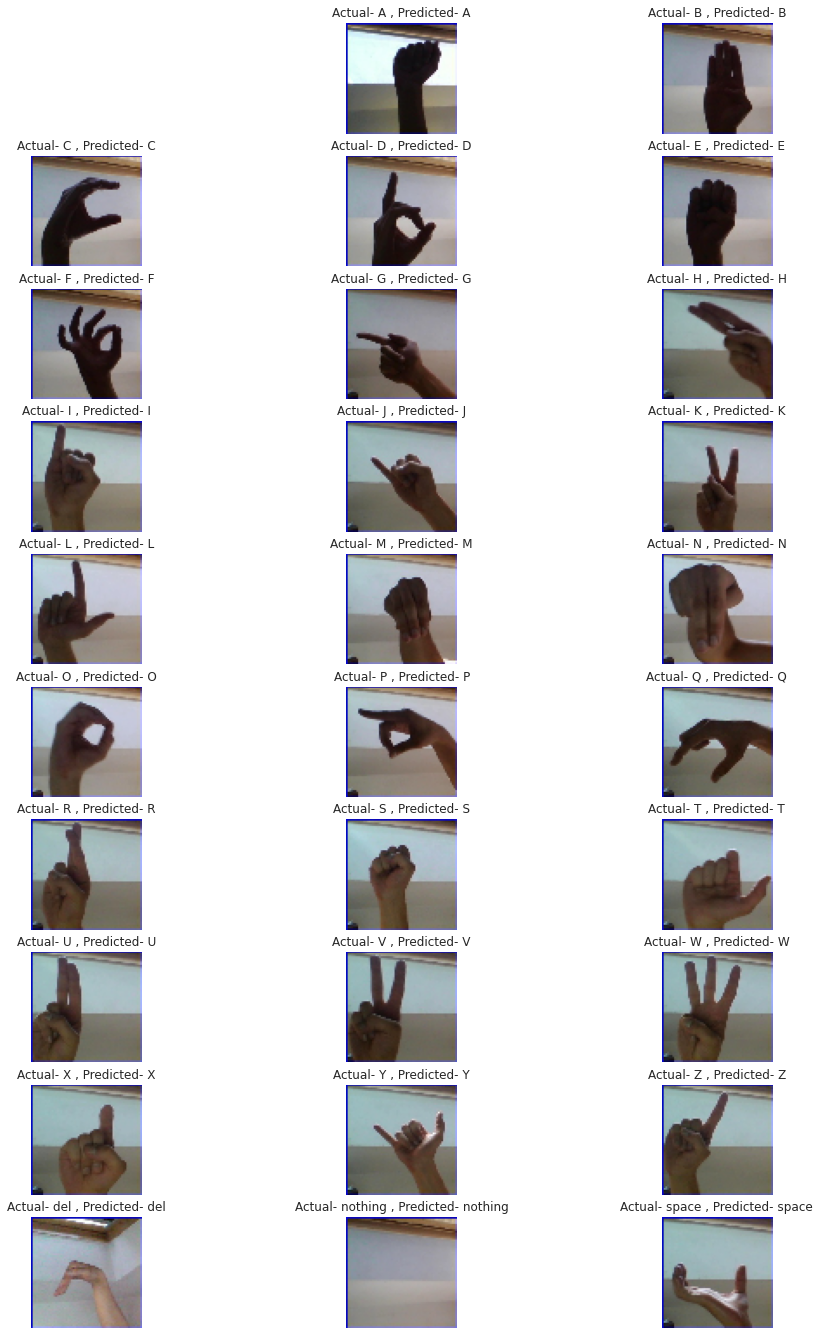

In [74]:
def test():
  i=1
  plt.figure(figsize=(16,24))

  for sign in classes:
    path = Path(test_dir + sign + '_test.jpg')
    img = image.load_img(path, target_size=(64,64))
    img_array = image.img_to_array(img)/255.0
    pred = model.predict(img_array.reshape(1, *img_array.shape))
    y_pred = np.argmax(pred, axis=1)[0]
    Y_pred = label_to_gesture[y_pred]
    Y_actual = sign
    # print(Y_pred, Y_actual)
    title = 'Actual- ' + Y_actual + ' , Predicted- ' + Y_pred 
    plt.subplot(10,3,i+1)
    i+=1
    plt.imshow(img_array)
    plt.title(title)
    plt.axis('off')
  # plt.tight_layout()
  plt.savefig('outputs/Output_{0}.png'.format(1))
  plt.show()
test()

In [75]:
# All the labels got correct.

In [2]:
# !mkdir outputs

In [1]:
# !dir